<a href="https://colab.research.google.com/github/salma8989/main/blob/main/GFP_Group_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Churn for Bank Customers**


Dataset : https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Raw Data Preparation**

# Information of dataset
*   RowNumber : corresponds to the record (row) number
*   CustomerId : contains random values of customerId
*   Surname : the surname of a customer 
*   CreditScore : can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank
*   Geography : a customer’s location
*   Gender : gender of customer
*   Age : age of customer
*   Tenure : refers to the number of years that the customer has been a client of the bank
*   Balance : balance of customer in the bank
*   NumOfProducts : refers to the number of products that a customer has purchased through the bank
*   HasCrCard : denotes whether or not a customer has a credit card (0=don't have,1=have)
*   IsActiveMember : denotes whether or not a customer is an active member (0=not active,1=active)
*   EstimatedSalary : estimated salary of customer
*   Exited : whether or not the customer left the bank (0=No,1=Yes)















In [2]:
dataset = 'https://docs.google.com/spreadsheets/d/1NvNx6Pkb0kvLwzSNHWXKe0V7q1x2sZTOtHTyusd7IKE/edit#gid=2015828187'
dataset_trf = dataset.replace('/edit#gid=', '/export?format=csv&gid=')
print(dataset_trf)
df = pd.read_csv(dataset_trf)
print(df.shape)
df.head()

https://docs.google.com/spreadsheets/d/1NvNx6Pkb0kvLwzSNHWXKe0V7q1x2sZTOtHTyusd7IKE/export?format=csv&gid=2015828187
(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Data Cleaning**

In [3]:
df1 = df.copy()

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Handling missing value

In [5]:
df1.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is no missing value

# Removing duplicate values

In [6]:
df1[df1.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


There is no duplicate value

# Change data type

In [7]:
df1['RowNumber'] = df1['RowNumber'].astype(object)

In [8]:
df1['CustomerId'] = df1['CustomerId'].astype(object)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  object 
 1   CustomerId       10000 non-null  object 
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 1.1+ MB


# Check typo in Categorical data

In [10]:
categorical_column = ['Geography','Gender','HasCrCard','IsActiveMember','Exited']

In [11]:
for i in categorical_column:
  unique_data = df[i].value_counts()
  print(unique_data,'\n')

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64 

Male      5457
Female    4543
Name: Gender, dtype: int64 

1    7055
0    2945
Name: HasCrCard, dtype: int64 

1    5151
0    4849
Name: IsActiveMember, dtype: int64 

0    7963
1    2037
Name: Exited, dtype: int64 



# Remove outliers

i= 0 el CreditScore
i= 1 el Age
i= 2 el Tenure
i= 3 el Balance
i= 4 el NumOfProducts
i= 5 el EstimatedSalary


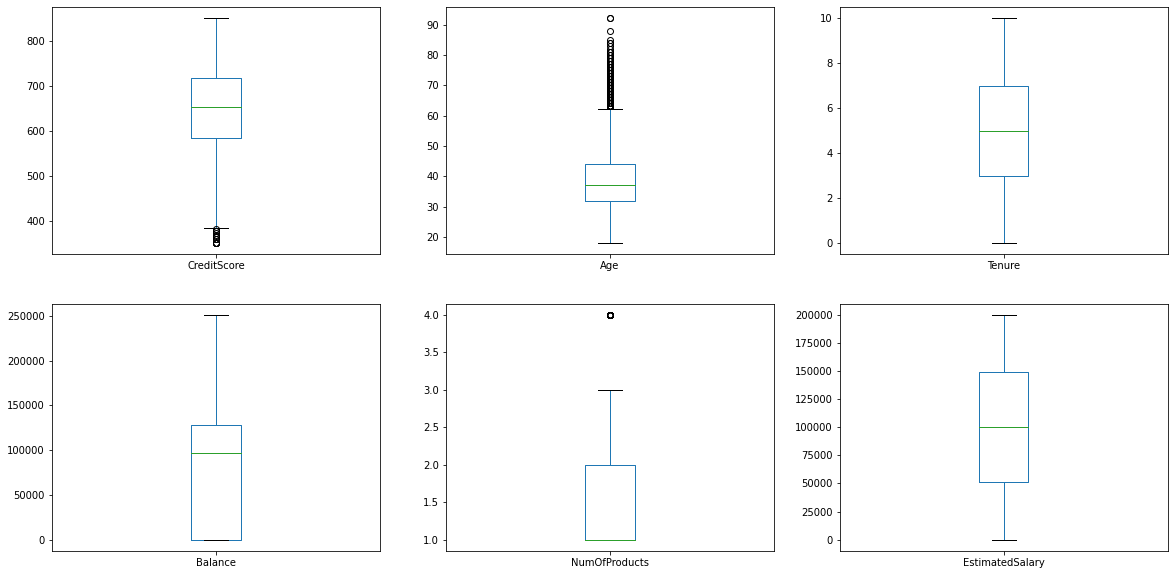

In [12]:
numerical_column = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
for i,el in enumerate(numerical_column):
    print('i=',i,'el',el)
    a = df1.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [13]:
#Check outlier in Age column
Q1 = df1['Age'].quantile(0.25)
Q3 = df1['Age'].quantile(0.75)
IQR = Q3-Q1
boxplot_max = Q3+(1.5*IQR)
boxplot_min = Q1-(1.5*IQR)

print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('max',boxplot_max)
print('min',boxplot_min)

Q1 32.0
Q3 44.0
IQR 12.0
max 62.0
min 14.0


In [14]:
filter_age_min = df1['Age']<boxplot_min
filter_age_max = df1['Age']>boxplot_max

df_outlier = df1[
    (filter_age_min|filter_age_max)]

df_outlier

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,59,15623944,T'ien,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,86,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,105,15804919,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,159,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,182,15789669,Hsia,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,9754,15705174,Chiedozie,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0
9765,9766,15777067,Thomas,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9832,9833,15814690,Chukwujekwu,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9894,9895,15704795,Vagin,521,France,Female,77,6,0.00,2,1,1,49054.10,0


In [15]:
df_outlier['Age'].count()

359

In [16]:
df_outlier['Age'].count()/df1['Age'].count()

0.0359

There is 3.59% outlier values in Age column. We decided to remove outlier

In [17]:
df1_clean = df1[(df1['Age']<=boxplot_max)&(df1['Age']>boxplot_min)]
df1_clean

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


i= 0 el CreditScore
i= 1 el Age
i= 2 el Tenure
i= 3 el Balance
i= 4 el NumOfProducts
i= 5 el EstimatedSalary


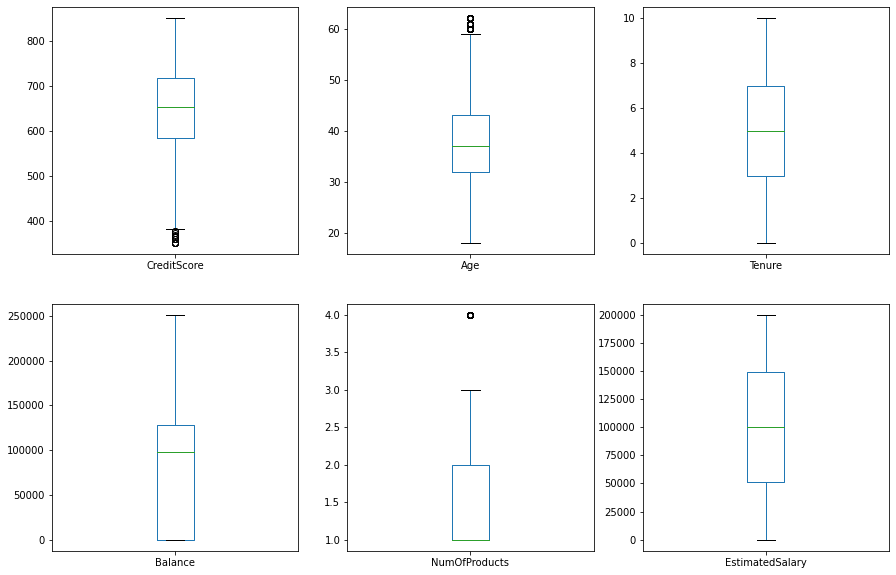

In [18]:
numerical_column = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,10))
for i,el in enumerate(numerical_column):
    print('i=',i,'el',el)
    a = df1_clean.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [19]:
#Check outlier in CreditScore column
Q1 = df1_clean['CreditScore'].quantile(0.25)
Q3 = df1_clean['CreditScore'].quantile(0.75)
IQR = Q3-Q1
boxplot_max1 = Q3+(1.5*IQR)
boxplot_min1 = Q1-(1.5*IQR)

print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('max',boxplot_max)
print('min',boxplot_min)

Q1 583.0
Q3 717.0
IQR 134.0
max 62.0
min 14.0


In [20]:
filter_creditscore_min = df1_clean['CreditScore']<boxplot_min1
filter_creditscore_max = df1_clean['CreditScore']>boxplot_max1

df_outlier1 = df1_clean[
    (filter_creditscore_min|filter_creditscore_max)]

df_outlier1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,943,15804586,Lin,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,1194,15779947,Thomas,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,1632,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,1839,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,1963,15692416,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,2474,15679249,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,2580,15597896,Ozoemena,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
8154,8155,15791533,Ch'ien,367,Spain,Male,42,6,93608.28,1,1,0,168816.73,1


In [21]:
df_outlier1['CreditScore'].count()

14

In [22]:
df_outlier1['CreditScore'].count()/df1_clean['CreditScore'].count()

0.0014521315216263872

There is 0.14% outlier values in CreditScore column. We decided to remove outlier

In [23]:
df2_clean = df1_clean[(df1_clean['CreditScore']<=boxplot_max1)&(df1['CreditScore']>boxplot_min1)]
df2_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


i= 0 el CreditScore
i= 1 el Age
i= 2 el Tenure
i= 3 el Balance
i= 4 el NumOfProducts
i= 5 el EstimatedSalary


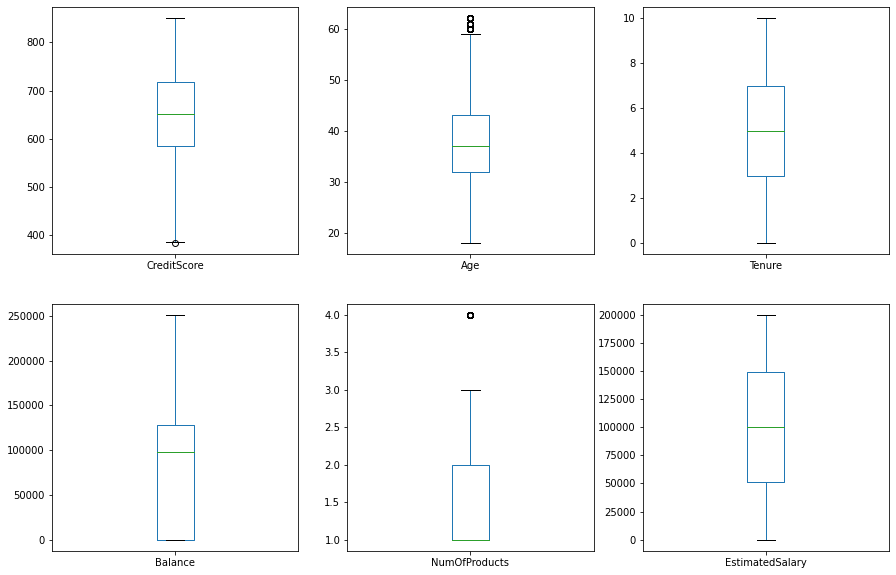

In [24]:
numerical_column = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,10))
for i,el in enumerate(numerical_column):
    print('i=',i,'el',el)
    a = df2_clean.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

Data clean : 9626 values/row

(10000-9626)/10000 = 0.0374 (3.74%)

We removed 3.74% outlier values 

In [25]:
df2_clean.to_csv('cleaned_dataset.csv')

# **EDA**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd33490c7d0>,
      dtype=object)

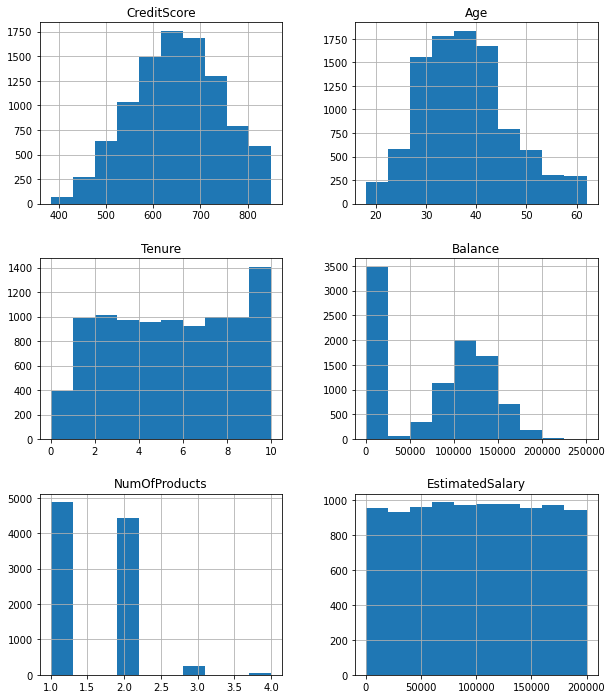

In [26]:
df2_clean[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].hist(figsize=(10,12))

In [27]:
df_desc_stat = df2_clean.describe()
df_desc_stat

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9626.000000,9626.000000,9626.000000,9626.000000,9626.000000,9626.000000,9626.000000,9626.000000,9626.000000
mean,650.737897,37.783087,5.016829,76545.811799,1.530958,0.704966,0.503532,100113.368207,0.202472
std,96.090508,8.798849,2.888172,62399.264935,0.580844,0.456082,0.500013,57521.570761,0.401863
min,383.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51012.472500,0.000000
50%,652.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,717.000000,43.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149414.455000,0.000000
max,850.000000,62.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [28]:
df_desc_stat = round(df_desc_stat,2)
df_desc_stat

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9626.00,9626.00,9626.00,9626.00,9626.00,9626.00,9626.0,9626.00,9626.0
mean,650.74,37.78,5.02,76545.81,1.53,0.70,0.5,100113.37,0.2
std,96.09,8.80,2.89,62399.26,0.58,0.46,0.5,57521.57,0.4
min,383.00,18.00,0.00,0.00,1.00,0.00,0.0,11.58,0.0
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.0,51012.47,0.0
50%,652.00,37.00,5.00,97277.13,1.00,1.00,1.0,100185.24,0.0
75%,717.00,43.00,7.00,127647.84,2.00,1.00,1.0,149414.46,0.0
max,850.00,62.00,10.00,250898.09,4.00,1.00,1.0,199992.48,1.0


In [29]:
df2_clean[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].mode()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,850,37,2,0.0,1,24924.92


In [30]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9626 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9626 non-null   object 
 1   CustomerId       9626 non-null   object 
 2   Surname          9626 non-null   object 
 3   CreditScore      9626 non-null   int64  
 4   Geography        9626 non-null   object 
 5   Gender           9626 non-null   object 
 6   Age              9626 non-null   int64  
 7   Tenure           9626 non-null   int64  
 8   Balance          9626 non-null   float64
 9   NumOfProducts    9626 non-null   int64  
 10  HasCrCard        9626 non-null   int64  
 11  IsActiveMember   9626 non-null   int64  
 12  EstimatedSalary  9626 non-null   float64
 13  Exited           9626 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 1.1+ MB


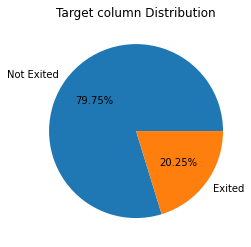

In [31]:
plt.title('Target column Distribution')
plt.pie(df2_clean['Exited'].value_counts(),labels = ['Not Exited', 'Exited'],autopct='%.2f%%')
plt.show() 

Exited,0,1
Geography,,
France,4049,777
Germany,1640,781
Spain,1988,391


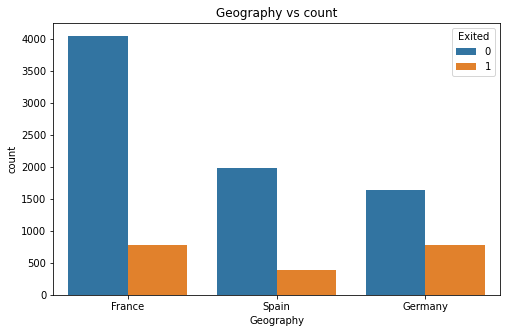

In [32]:
fig = plt.figure(figsize=(8,5)) 
ax = sns.countplot(x="Geography", hue="Exited", data=df2_clean).set_title("Geography vs count")

pd.crosstab(df2_clean['Geography'], df2_clean['Exited'])

Exited,0,1
Gender,,
Female,3278,1090
Male,4399,859


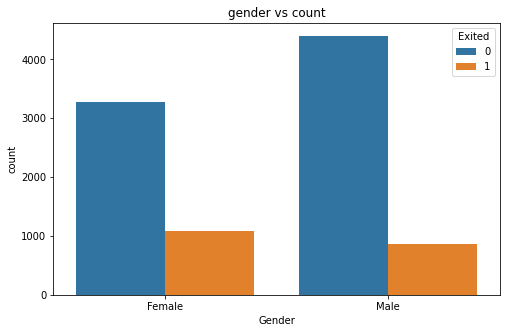

In [33]:
fig = plt.figure(figsize=(8,5)) 
ax = sns.countplot(x="Gender", hue="Exited", data=df2_clean).set_title("gender vs count")

pd.crosstab(df2_clean['Gender'], df2_clean['Exited'])


Exited,0,1
HasCrCard,,
0,2250,590
1,5427,1359


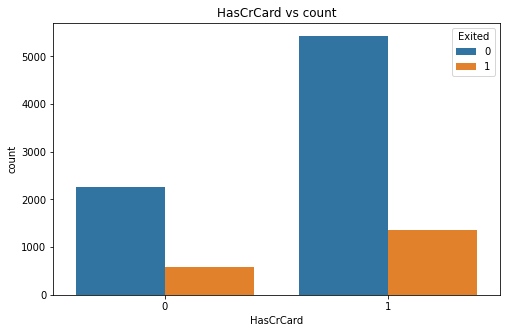

In [34]:
fig = plt.figure(figsize=(8,5)) 
ax = sns.countplot(x="HasCrCard", hue="Exited", data=df2_clean).set_title("HasCrCard vs count")

pd.crosstab(df2_clean['HasCrCard'], df2_clean['Exited'])


Exited,0,1
IsActiveMember,,
0,3534,1245
1,4143,704


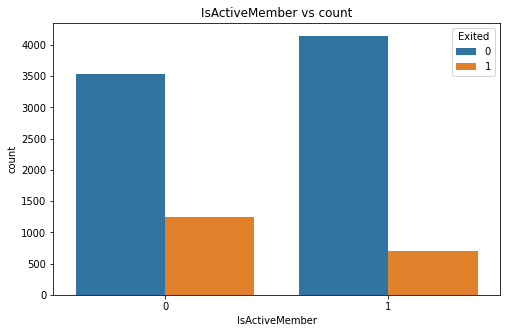

In [35]:
fig = plt.figure(figsize=(8,5)) 
ax = sns.countplot(x="IsActiveMember", hue="Exited", data=df2_clean).set_title("IsActiveMember vs count")

pd.crosstab(df2_clean['IsActiveMember'], df2_clean['Exited'])

Exited,0,1
NumOfProducts,,
1,3529,1353
2,4106,329
3,42,209
4,0,58


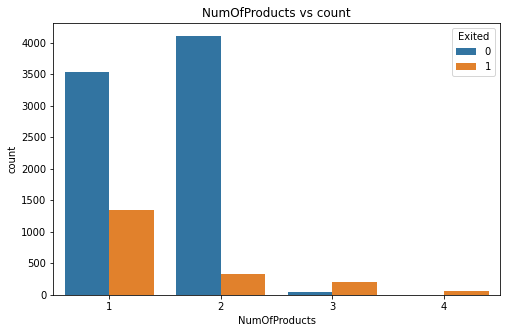

In [36]:
fig = plt.figure(figsize=(8,5)) 
ax = sns.countplot(x="NumOfProducts", hue="Exited", data=df2_clean).set_title("NumOfProducts vs count")

pd.crosstab(df2_clean['NumOfProducts'], df2_clean['Exited'])

# **Correlation**

# Deal with categorical variables

In [37]:
binary_categorical_column = ['Gender']
polytomous_categorical_column = ['Geography']

In [38]:
df_new = df2_clean.copy()
for i in binary_categorical_column:
  print(i)
  df_new[i] = df_new[i].astype('category')
  df_new[i] = df_new[i].cat.codes

df_new

Gender


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


Gender 0 = Female 1 = Male

In [39]:
for i in polytomous_categorical_column:
  dum_df = pd.get_dummies(df_new, columns=[i], prefix=[i])
  df_new = df_new.merge(dum_df)

In [40]:
df_new

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9621,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9622,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9623,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9624,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [41]:
df_new.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

List the column that we want to see the correlation (excluding the one that are still in string)

In [42]:
corr_column = ['Exited', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain']

In [43]:
df_new[corr_column].corr()

,Exited,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
Exited,1.000000,-0.016413,-0.106762,0.358494,-0.012872,0.116913,-0.050669,-0.008491,-0.143424,0.009123,-0.103478,0.173279,-0.054349
CreditScore,-0.016413,1.000000,-0.004011,-0.013055,-0.000798,0.007229,0.011554,-0.000914,0.020416,0.002609,-0.011523,0.006981,0.006335
Gender,-0.106762,-0.004011,1.000000,-0.030700,0.014560,0.010465,-0.021116,0.006538,0.021880,-0.007245,0.009139,-0.027134,0.016700
Age,0.358494,-0.013055,-0.030700,1.000000,-0.010576,0.041412,-0.032473,-0.016363,0.017838,-0.005601,-0.050941,0.062840,-0.004160
Tenure,-0.012872,-0.000798,0.014560,-0.010576,1.000000,-0.012925,0.015049,0.019781,-0.027236,0.010031,-0.002390,-0.000310,0.003082
Balance,0.116913,0.007229,0.010465,0.041412,-0.012925,1.000000,-0.304347,-0.013795,-0.006958,0.010241,-0.229714,0.401628,-0.137710
NumOfProducts,-0.050669,0.011554,-0.021116,-0.032473,0.015049,-0.304347,1.000000,0.002714,0.011250,0.013560,0.000214,-0.010903,0.010719
HasCrCard,-0.008491,-0.000914,0.006538,-0.016363,0.019781,-0.013795,0.002714,1.000000,-0.012287,-0.010259,0.004936,0.010121,-0.015902
IsActiveMember,-0.143424,0.020416,0.021880,0.017838,-0.027236,-0.006958,0.011250,-0.012287,1.000000,-0.010309,-0.000019,-0.015828,0.015942
EstimatedSalary,0.009123,0.002609,-0.007245,-0.005601,0.010031,0.010241,0.013560,-0.010259,-0.010309,1.000000,-0.000641,0.010442,-0.009761


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


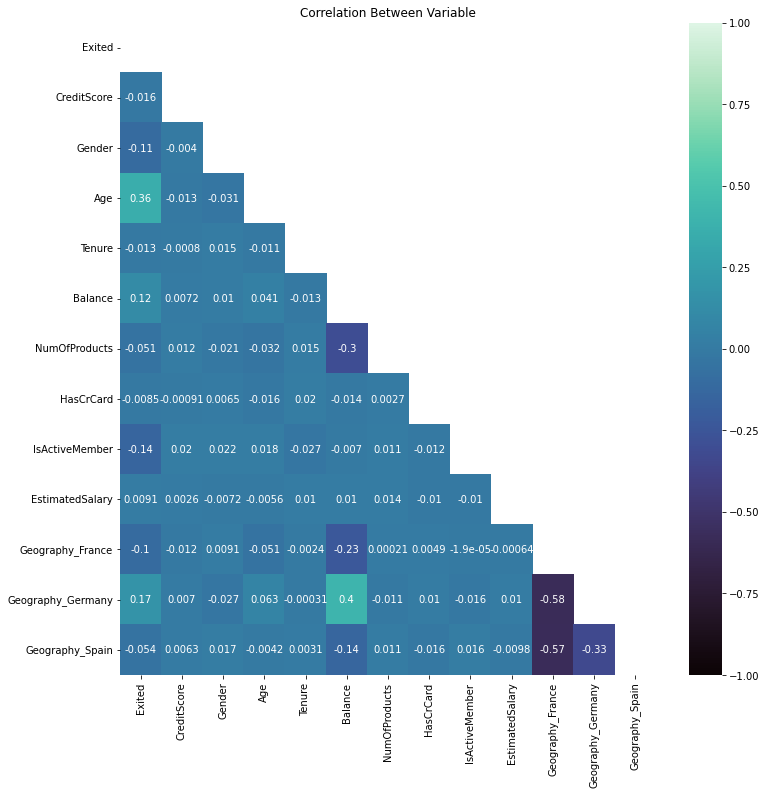

In [44]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

mask = np.triu(np.ones_like(
    df_new[corr_column].corr(), dtype=np.bool))

sns.heatmap(df_new[corr_column].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":10})

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


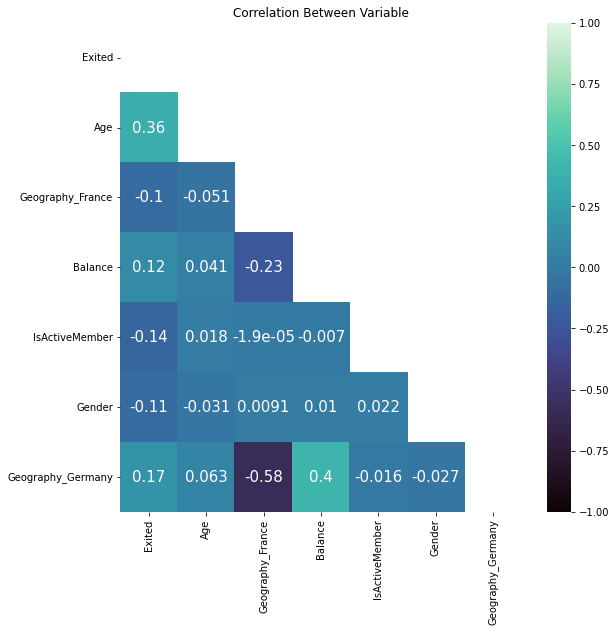

In [45]:
corr_column_new = ['Exited', 'Age', 'Geography_France', 'Balance', 'IsActiveMember', 'Gender', 'Geography_Germany']

fig = plt.figure(figsize=(9,9))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

mask = np.triu(np.ones_like(
    df_new[corr_column_new].corr(), dtype=np.bool))
sns.heatmap(df_new[corr_column_new].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":15})

plt.show()

Exited is correlated with

*   Age = 0.36
*   Gender = -0.11
*   Balance = 0.12
*   IsActiveMember = -0.14
*   Geography_France = -0.1
*   Geography_Germany = 0.17



# **Logistic Regression**

# Import Library

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_curve, roc_auc_score, recall_score, precision_recall_curve, f1_score

In [47]:
df_new

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9621,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9622,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9623,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9624,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


# Remove Irrelevant Values

In [48]:
df_new.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Geography_Spain'], axis = 1, inplace=True)
df_new.head()   

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0


# Split data into input and output objects

In [49]:
X = df_new.drop(['Exited'], axis =1)
y = df_new[['Exited']]
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0


In [50]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


# Split out training & test sets

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

stratify = y, make proportion train and set have same proportion 0 and 1 (Exited) data

# Feature Scalling

In [52]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train1 = scalar.fit_transform(X_train)
X_test1 = scalar.transform(X_test)

# Model training

In [53]:
clf = LogisticRegression(random_state=42, max_iter=1000, class_weight = 'balanced')
clf.fit(X_train1, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [54]:
y_pred = clf.predict(X_test1)

In [55]:
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [56]:
clf.coef_


array([[-0.04526011, -0.29336174,  0.95474193, -0.02540225,  0.19612886,
        -0.05758583, -0.02542051, -0.39149518,  0.01960924, -0.03341148,
         0.29247105]])

In [57]:
coefs = pd.DataFrame(clf.coef_[0], columns=['coef'])
coefs


,coef
0,-0.045260
1,-0.293362
2,0.954742
3,-0.025402
4,0.196129
5,-0.057586
6,-0.025421
7,-0.391495
8,0.019609
9,-0.033411


In [58]:
odds_ratio = pd.DataFrame(np.exp(clf.coef_[0]), columns=['odds_ratio'])
odds_ratio 

,odds_ratio
0,0.955749
1,0.745752
2,2.598000
3,0.974918
4,1.216684
5,0.944041
6,0.974900
7,0.676045
8,1.019803
9,0.967141


In [59]:
coef_odds_ratio = coefs.merge(odds_ratio, left_index = True, right_index = True)
coef_odds_ratio

,coef,odds_ratio
0,-0.045260,0.955749
1,-0.293362,0.745752
2,0.954742,2.598000
3,-0.025402,0.974918
4,0.196129,1.216684
5,-0.057586,0.944041
6,-0.025421,0.974900
7,-0.391495,0.676045
8,0.019609,1.019803
9,-0.033411,0.967141


In [60]:
X.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany'],
      dtype='object')

In [61]:
columns = pd.DataFrame(X.columns, columns=['name'])
columns

,name
0,CreditScore
1,Gender
2,Age
3,Tenure
4,Balance
5,NumOfProducts
6,HasCrCard
7,IsActiveMember
8,EstimatedSalary
9,Geography_France


In [62]:
coef_odds_ratio_ = coef_odds_ratio.merge(columns, left_index = True, right_index = True)
coef_odds_ratio_

,coef,odds_ratio,name
0,-0.045260,0.955749,CreditScore
1,-0.293362,0.745752,Gender
2,0.954742,2.598000,Age
3,-0.025402,0.974918,Tenure
4,0.196129,1.216684,Balance
5,-0.057586,0.944041,NumOfProducts
6,-0.025421,0.974900,HasCrCard
7,-0.391495,0.676045,IsActiveMember
8,0.019609,1.019803,EstimatedSalary
9,-0.033411,0.967141,Geography_France


*   If the odds ratio is 1, it means nothing changes.
*   If it's above 1, the odds increase. 
*   If it's below 1, the odds decrease.

1.   One unit increase in CreditScore is associated with a decrease in 0.95x the odds of the response variable churn rate
2.   Gender Male is associated with a decrease in 0.74x the odds of the response variable churn rate
3.   One unit increase in Age is associated with a increase in 2.59x the odds of the response variable churn rate
4.   One unit increase in Tenure is associated with a decrease in 0.97x the odds of the response variable churn rate
5.   One unit increase in Balance is associated with a increase in 1.21x the odds of the response variable churn rate
6.   One unit increase in NumOfProducts is associated with a decrease in 0.94x the odds of the response variable churn rate
7.   HasCrCard is associated with a decrease in 0.97x the odds of the response variable churn rate
8.   IsActiveMember is associated with a decrease in 0.67x the odds of the response variable churn rate
9.   One unit increase in EstimatedSalary is associated with a increase in 1.01x the odds of the response variable churn rate
10.   Geography_France is associated with a decrease in 0.97x the odds of the response variable churn rate
11.   Geography_Germany is associated with a increase in 1.33x the odds of the response variable churn rate




# Confusion matrix

In [66]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[1122  414]
 [ 111  279]]


Text(0.5, 320.8, 'Predicted label')

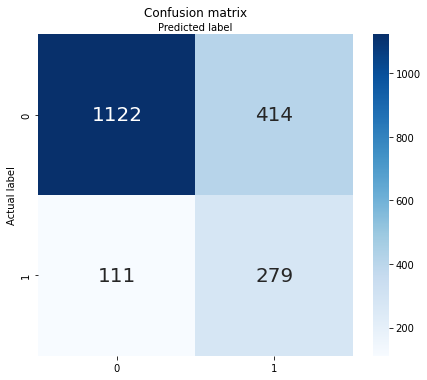

In [67]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="Blues" ,fmt='g', annot_kws={'fontsize': 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1536
           1       0.40      0.72      0.52       390

    accuracy                           0.73      1926
   macro avg       0.66      0.72      0.66      1926
weighted avg       0.81      0.73      0.75      1926



In [65]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Precision Score: {precision_score(y_test, y_pred)}') 
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

Accuracy Score: 0.7274143302180686
Precision Score: 0.4025974025974026
Area Under Curve: 0.7229266826923078
Recall Score: 0.7153846153846154
F1 Score: 0.5152354570637119


Accuracy (the number of correct classification out of all attempted classification) = 73 %

Precision (of all observation that were predicted as exited, how many were actually exited) = 40%

Recall/sensitivity (of all customers who actually exited, how many did we correctly exited) = 72 %

F-1 score (the harmonic mean of Precision and Recall) =  0.52

A good F-1 Score comes when there is a balance between Precision and Recall.

2*(Recall*Precision)/(Recall+Precision)

#Receiver Operating Characteristic(ROC) curve 

a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

In [69]:
from sklearn import metrics

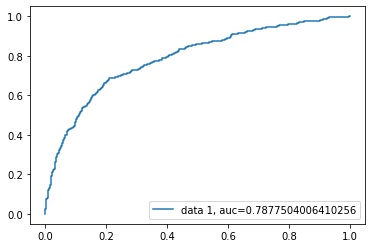

In [70]:
y_pred_proba = clf.predict_proba(X_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In the framework of imbalanced datasets, accuracy score might not be the best metric to evaluate model performance, since it doesn’t distinguish between numbers of correctly classified examples of different classes. Therefore, the best metric to evaluate an imbalance dataset is recall, f1 score, area under curve, ROC (Receiver Operating Characteristics) and so on.

#Create dataframe from the churn predictions series

In [71]:
churn = pd.DataFrame(y_pred, columns=['Churn_Pred'])
churn

,Churn_Pred
0,1
1,0
2,0
3,0
4,1
...,...
1921,1
1922,1
1923,1
1924,0


In [72]:
data = pd.DataFrame(X_test, columns=['CreditScore',	'Gender',	'Age',	'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard',	'IsActiveMember',	'EstimatedSalary',	'Geography_France',	'Geography_Germany'])
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany
515,519,0,57,2,119035.35,2,1,1,29871.79,0,0
6962,716,0,29,6,0.00,2,1,1,98998.61,1,0
6935,689,0,30,5,136650.89,1,1,1,41865.72,0,1
4077,595,1,29,6,150685.79,1,1,0,87771.06,1,0
6167,850,1,55,0,98710.89,1,1,1,83617.17,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6561,779,0,42,5,0.00,2,0,0,25951.91,1,0
8587,641,0,52,4,0.00,1,1,0,90964.54,1,0
2350,537,1,39,3,135309.36,1,1,0,31728.86,0,1
5237,701,1,28,1,103421.32,1,0,1,76304.73,0,0


In [73]:
X_test.reset_index(drop=True, inplace=True)
X_test

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany
0,519,0,57,2,119035.35,2,1,1,29871.79,0,0
1,716,0,29,6,0.00,2,1,1,98998.61,1,0
2,689,0,30,5,136650.89,1,1,1,41865.72,0,1
3,595,1,29,6,150685.79,1,1,0,87771.06,1,0
4,850,1,55,0,98710.89,1,1,1,83617.17,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1921,779,0,42,5,0.00,2,0,0,25951.91,1,0
1922,641,0,52,4,0.00,1,1,0,90964.54,1,0
1923,537,1,39,3,135309.36,1,1,0,31728.86,0,1
1924,701,1,28,1,103421.32,1,0,1,76304.73,0,0


In [74]:
data_predict = X_test.merge(churn, left_index = True, right_index = True)
data_predict

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Churn_Pred
0,519,0,57,2,119035.35,2,1,1,29871.79,0,0,1
1,716,0,29,6,0.00,2,1,1,98998.61,1,0,0
2,689,0,30,5,136650.89,1,1,1,41865.72,0,1,0
3,595,1,29,6,150685.79,1,1,0,87771.06,1,0,0
4,850,1,55,0,98710.89,1,1,1,83617.17,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1921,779,0,42,5,0.00,2,0,0,25951.91,1,0,1
1922,641,0,52,4,0.00,1,1,0,90964.54,1,0,1
1923,537,1,39,3,135309.36,1,1,0,31728.86,0,1,1
1924,701,1,28,1,103421.32,1,0,1,76304.73,0,0,0


#Retrieve the data of churned customers

In [75]:
churn_data = data_predict.query('Churn_Pred == 1')
churn_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Churn_Pred
0,519,0,57,2,119035.35,2,1,1,29871.79,0,0,1
4,850,1,55,0,98710.89,1,1,1,83617.17,0,1,1
9,644,0,46,6,12459.19,1,0,0,156787.34,0,0,1
12,516,0,47,9,128298.74,1,0,0,149614.17,0,1,1
13,697,1,42,9,132739.26,2,0,0,174667.65,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1919,524,1,40,2,180516.90,1,1,0,180002.42,1,0,1
1921,779,0,42,5,0.00,2,0,0,25951.91,1,0,1
1922,641,0,52,4,0.00,1,1,0,90964.54,1,0,1
1923,537,1,39,3,135309.36,1,1,0,31728.86,0,1,1


In [76]:
churn_data.to_csv('churn_model_dataset.csv')

In [77]:
churn_data_stat = churn_data[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']].describe()
churn_data_stat

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,693.000000,693.000000,693.000000,693.000000,693.000000
mean,648.399711,45.633478,5.069264,98208.942482,99465.365152
std,96.064498,7.526341,2.875719,55490.107837,58106.066261
min,418.000000,28.000000,0.000000,0.000000,487.300000
25%,581.000000,40.000000,3.000000,80764.030000,49656.240000
50%,647.000000,45.000000,5.000000,113877.230000,100564.370000
75%,714.000000,51.000000,8.000000,134504.780000,147184.740000
max,850.000000,62.000000,10.000000,208165.530000,199862.750000


In [78]:
churn_data_stat = round(churn_data_stat,2)
churn_data_stat

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,693.00,693.00,693.00,693.00,693.00
mean,648.40,45.63,5.07,98208.94,99465.37
std,96.06,7.53,2.88,55490.11,58106.07
min,418.00,28.00,0.00,0.00,487.30
25%,581.00,40.00,3.00,80764.03,49656.24
50%,647.00,45.00,5.00,113877.23,100564.37
75%,714.00,51.00,8.00,134504.78,147184.74
max,850.00,62.00,10.00,208165.53,199862.75


In [79]:
churn_data_stat[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']].mode()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,96.06,7.53,0.00,0.00,487.30
1,418.00,28.00,2.88,693.00,693.00
2,581.00,40.00,3.00,55490.11,49656.24
3,647.00,45.00,5.00,80764.03,58106.07
4,648.40,45.63,5.07,98208.94,99465.37
5,693.00,51.00,8.00,113877.23,100564.37
6,714.00,62.00,10.00,134504.78,147184.74
7,850.00,693.00,693.00,208165.53,199862.75


In [80]:
numerical_column1 = ['CreditScore','Age', 'Tenure','Balance','EstimatedSalary']

In [81]:
for i in numerical_column1:
  unique_data = churn_data[i].value_counts()
  print(unique_data,'\n')

850    16
608     8
705     8
637     7
621     6
       ..
555     1
754     1
827     1
455     1
537     1
Name: CreditScore, Length: 319, dtype: int64 

42    46
43    44
45    40
40    39
44    36
46    33
41    33
47    32
49    29
39    28
37    26
51    24
48    23
36    20
57    20
60    18
55    17
58    17
38    17
50    16
52    16
56    15
54    14
35    14
53    12
59    12
34    11
33     9
61     8
62     7
30     4
29     4
31     4
32     4
28     1
Name: Age, dtype: int64 

7     77
3     76
8     75
5     75
2     70
6     68
9     68
1     67
4     56
10    32
0     29
Name: Tenure, dtype: int64 

0.00         138
119035.35      1
123699.28      1
77270.08       1
141428.99      1
            ... 
127948.57      1
115280.49      1
162318.61      1
121980.56      1
142876.98      1
Name: Balance, Length: 556, dtype: int64 

29871.79     1
31669.18     1
151516.70    1
171774.50    1
190457.87    1
            ..
49848.86     1
13614.01     1
4721.30      1
123242.11

In [82]:
categorical_column1 = ['Gender','NumOfProducts', 'HasCrCard','IsActiveMember','Geography_France', 'Geography_Germany']

In [83]:
for i in categorical_column1:
  unique_data = churn_data[i].value_counts()
  print(unique_data,'\n')

0    414
1    279
Name: Gender, dtype: int64 

1    404
2    245
3     33
4     11
Name: NumOfProducts, dtype: int64 

1    456
0    237
Name: HasCrCard, dtype: int64 

0    446
1    247
Name: IsActiveMember, dtype: int64 

0    449
1    244
Name: Geography_France, dtype: int64 

0    383
1    310
Name: Geography_Germany, dtype: int64 



Customers who Exited from Logistic regression model

**1. Credit Score**

850 = 16;
608 = 8;
705 = 8;
637 = 7;
621 = 6

**2. Age**

39 - 49

**3. Tenure**

1-9

**4. Balance**

0 = 138

**5. Gender**

Male = 279;
Female = 414

**6. Num of Product**

1 = 404;
2 = 245;
3 = 33;
4 = 11

**7. Credit Card**

Have = 456;
Don't have = 237

**8. Is Active Member**

Active = 247;
Not active = 446

**9. Geography France = 244**

**10. Geography Germany = 310**

**11. Geography Spain = 139**